# Analiza podataka

In [2]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 9.6 MB/s 


Sledi importovanje potrebnih biblioteka.

In [3]:
import tensorflow as tf
from google.colab import files
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

Učitava se csv fajl koji sadrži skup podataka sa kojim ćemo raditi. Ovaj skup podataka opisuje medicinsku dokumentaciju za Indijance Pima
i ispituje da li će svaki pacijent imati početak dijabetesa u roku od pet godina.

In [4]:

file=files.upload()
columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
dataset=pd.read_csv("pima-indians-diabetes.csv", names=columns)

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [5]:

data1=dataset.copy()

Prikažimo prvih pet vrsta učitanog skupa podataka.

In [6]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Potrebno je proveriti da li skup podataka sadrži nedostajuće vrednosti. Iz priloženog vidimo one ne postoje, skup podataka je potpun.

In [7]:

dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Funkcija describe() omogućava jedan vid analize podataka. Daje informacije kao što su standradno odstupanje, srednja vrednost, minimum, maksimum itd. U koloni BMI je najmanja vrednost 0, što može prestavljati i grešku u unosu podataka, jer realne vrednosti za BMI ne mogu biti 0.

In [8]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pozivom sledeće komande vidimo kom tipu pripadaju pvrednosti iz svake kolone.

In [9]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Matricom korelacije proveravamo u kolikoj su korelaciji atributi. Možemo videti da je najveća korelacija između kolone "Outcome" koja predstavlja informaciju da li će osoba dobiti dijabetes i kolone "Glucose" koja predstavlja koncentracijau glukoze u krvnoj plazmi. 

In [10]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#Predviđanje krvnog pritiska u odnosu na BMI i starost

## Podela na skup za treniranje i skup za testiranje 

Sada želimo da predvidimo krvni pritisak osobe u odnosu na njen BMI i godine.
Delimo skup podataka na skup za treniranje i skup za testiranje. Svaki od njih je podeljen na kolone koje će služiti za ulaz mrežu i na kolonu "BloodPressure" koja je izlaz iz mreže, tj. vrednost koja se prediktuje.

In [11]:
subset=dataset[['BMI','Age','BloodPressure']]

train_dataset = subset.sample(frac=0.8, random_state=0)
test_dataset = subset.drop(train_dataset.index)

X_train = train_dataset.copy()
X_test = test_dataset.copy()

y_train = pd.DataFrame(X_train.pop('BloodPressure'))
y_test = pd.DataFrame(X_test.pop('BloodPressure'))


Pomoću sledeća dva poziva vidimo da smo dobro podelili naš skup podataka, jer se indeksi za X_train i y_train poklapaju.

In [12]:
X_train.head()

,BMI,Age
661,42.9,22
122,33.6,23
113,34.0,25
14,25.8,51
529,24.6,31


In [13]:
y_train.head()

,BloodPressure
661,76
122,74
113,62
14,72
529,65


## Kreiranje neuronske mreže pomoću TensorFlow biblioteke

Nakon što se importuju potrebne biblioteke, sledi kreiranje neuronske mreže. Ona će imati jedan sloj neurona, dva ulaza i linearnu aktivacionu funkciju. Loss je tipa "mse"- Mean square error, optimizer "rmsprop" koji se često koristi za linearnu regresiju i korišćena je "mse" metrika.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import regularizers
tf.random.set_seed(42)

model = tf.keras.Sequential(
    tf.keras.layers.Dense(1,input_dim=2, activation='linear', kernel_regularizer=regularizers.l2(0.01))
)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(
    loss='mse',
    optimizer=opt,
    metrics=['mse']
)

history = model.fit(X_train, y_train, epochs=1000, verbose=0)
model.evaluate(X_test,y_test,batch_size=64)

3/3 [==============================] - 0s 4ms/step - loss: 552.3749 - mse: 552.3729


[552.3748779296875, 552.3728637695312]

##Formiranje predikcije

Predikcije dobijamo pozivom funkcije predict, kojoj šaljemo skup podataka za testiranje koji ne sadrži atribut za koji se vrši predikcija.

In [16]:
predictions = model.predict(X_test)

In [17]:
print(predictions[:5])

[[43.189674]
 [56.324047]
 [54.58414 ]
 [51.762245]
 [53.051224]]


Da bismo sagledali koliko naš model greši u proceni za prvih 5 vrsta, izvojimo stvarne vrednosti za pritisak u posebnu promenljivu. Isto tako, izvojimo i prvih 5 vrsta iz naše predikcije.

In [18]:
bloodPressure=dataset['BloodPressure']


In [19]:
bloodPressure=bloodPressure[:5]
print(bloodPressure)

0    72
1    66
2    64
3    66
4    40
Name: BloodPressure, dtype: int64


In [20]:
predictions=predictions.flatten()
pred = predictions[:5]
print(pred)

[43.189674 56.324047 54.58414  51.762245 53.051224]


Ispod je prikazana pomenuta razlika između stvarnih i prediktovanih vrednosti.

In [21]:
diff=abs(bloodPressure-pred)
print(diff)

0    28.810326
1     9.675953
2     9.415859
3    14.237755
4    13.051224
Name: BloodPressure, dtype: float64


In [22]:
bloodPress=dataset['BloodPressure']

Na slici je predstavljen grafik na čijoj su x-osi stvarne vrednosti pritiska, a na y-osi prediktovane. Model ne fituje podatke na najbolji mogući način, jer tačke treba što više da budu skoncentrisane oko linearne prave. 

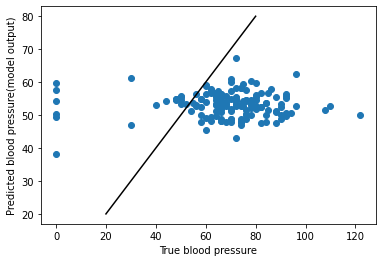

In [23]:
plt.scatter(bloodPress[:150], predictions[:150])
plt.xlabel('True blood pressure')
plt.ylabel('Predicted blood pressure(model output)')
plt.plot([20,80],[20,80],color='black')
plt.show()

#Predviđanje starosti u odnosu na BMI i krvni pritisak

S obzirom da je BMI kolona numeričkog tipa, možemo se malo zabaviti sa ovom kolonom i formirati od nje kategorijski atribut u zavisnosti od toga koliku vrednost uzima. Formiran je nov atrinut pod nazivom "BMI_clas" Ukoliko je BMI manji ili jednak 27, pripadaće grupi niskih BMI vrednosti, od 28 do 40 srednjih i 40 i više grupi visokoih. 

In [25]:
(data1[data1['BMI']>=40]).shape

(98, 9)

In [26]:
(data1[data1['BMI']<=27]).shape

(185, 9)

In [27]:
(data1[(data1['BMI']<40) & (data1['BMI']>27)]).shape

(485, 9)

In [28]:
data1.shape

(768, 9)

In [29]:
data1['BMI_clas']=data1["BMI"].apply(lambda x: 'low' if x <= 27 else 'medium' if (x<40) & (x>27) else 'high' )
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_clas
0,6,148,72,35,0,33.6,0.627,50,1,medium
1,1,85,66,29,0,26.6,0.351,31,0,low
2,8,183,64,0,0,23.3,0.672,32,1,low
3,1,89,66,23,94,28.1,0.167,21,0,medium
4,0,137,40,35,168,43.1,2.288,33,1,high


Novonastalu kategorijsku promenljivu enkodiramo pomoću LabelEncoder-a, jer model regresije ne radi sa kategorijskim podacima.

In [30]:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data1['BMI_clasEncode']= label_encoder.fit_transform(data1['BMI_clas'])
 
data1['BMI_clasEncode'].unique()

array([2, 1, 0])

Dakle, kategorijske vrednosti su zamenje numeričkim 0, 1 i 2. U tabeli ispod to možemo i videti

In [32]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_clas,BMI_clasEncode
0,6,148,72,35,0,33.6,0.627,50,1,medium,2
1,1,85,66,29,0,26.6,0.351,31,0,low,1
2,8,183,64,0,0,23.3,0.672,32,1,low,1
3,1,89,66,23,94,28.1,0.167,21,0,medium,2
4,0,137,40,35,168,43.1,2.288,33,1,high,0


Izdvojimo u novi dataframe kolone koje su nam potrebne. Zatim podelimo skup podataka na skup za treniranje i testiranje, kao i u prethodnom slučaju. Atribut "Age" će biti izlaz iz mreže, a ostale dve kolone ulaz.

In [33]:
subset1=data1[['BMI_clasEncode','Age','BloodPressure']]

train_dataset1 = subset1.sample(frac=0.8, random_state=0)
test_dataset1 = subset1.drop(train_dataset1.index)

X_train1 = train_dataset1.copy()
X_test1 = test_dataset1.copy()

y_train1 = pd.DataFrame(X_train1.pop('Age'))
y_test1 = pd.DataFrame(X_test1.pop('Age'))

Formira se neuronske mreža, sa odgovarajućim svojsvima i pokrene se treniranje.

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import regularizers

tf.random.set_seed(42)

model1 = tf.keras.Sequential(
    tf.keras.layers.Dense(1,input_dim=2, activation='linear', kernel_regularizer=regularizers.l2(0.001))
)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model1.compile(
    loss='mse',
    optimizer=opt,
    metrics=['mse']
)

history1 = model1.fit(X_train1, y_train1, epochs=1000, verbose=0)
model1.evaluate(X_test1,y_test1,batch_size=64)

3/3 [==============================] - 0s 5ms/step - loss: 143.8434 - mse: 143.8271


[143.84344482421875, 143.82705688476562]

Uraditi predikciju i dobijene vrednosti predstaviti na istom grafiku gde i stvarne vrednosti. Trebalo bi poraditi na pobošljanju našeg modela, jer sa date slike vidimo da tačne nisu grupisane oko linearne prave.

In [38]:
predictions1 = model1.predict(X_test1)

In [39]:
predictions1=predictions1.flatten()


In [40]:
predictions1.shape

(154,)

In [41]:
true_age=data1['Age']

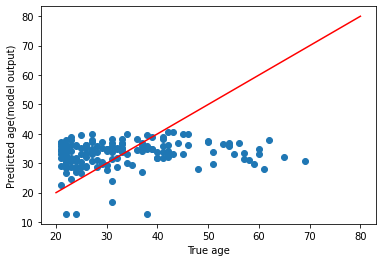

In [42]:
plt.scatter(true_age[:154], predictions1[:154])
plt.xlabel('True age')
plt.ylabel('Predicted age(model output)')
plt.plot([20,80],[20,80],color='red')
plt.show()